In [46]:
import os
import cv2
import numpy as np
import pandas as pd
import sys
sys.path.append("..")
from utils.imutils import jimshow as show
from utils.imutils import jimshow_channel as show_channel
import matplotlib.pyplot as plt

In [47]:
# This function reads all the images, creates the corresponding color histograms and normalizes them.
# Afterwards it compares each normalized histogram with that of the chosen image and saves the image name and
# result in the appropriate list
def create_and_compare_hist(in_folderpath, image_files, chosen_norm_hist):
    image_names = []
    results = []

    for image_file in image_files:
        image_path = os.path.join(in_folderpath, image_file)
        image_names.append(image_file)
        image = cv2.imread(image_path)
        image_hist = cv2.calcHist([image], [0,1,2], None, [256,256,256], [0,256, 0,256, 0,256])
        norm_hist = cv2.normalize(image_hist, image_hist, 0, 1.0, cv2.NORM_MINMAX)
        comparisons = round(cv2.compareHist(chosen_norm_hist, norm_hist, cv2.HISTCMP_CHISQR), 2)
        results.append(comparisons)
    return image_names, results

In [48]:
# This function reads the chosen image and creates a normalized color histogram of it.
def create_chosen_hist(chosen_image_path):  
    chosen_image = cv2.imread(chosen_image_path)
    chosen_image_hist = cv2.calcHist([chosen_image], [0,1,2], None, [256,256,256], [0,256, 0,256, 0,256])
    chosen_norm_hist = cv2.normalize(chosen_image_hist, chosen_image_hist, 0, 1.0, cv2.NORM_MINMAX)
    return chosen_norm_hist

In [49]:
def save_results(in_folderpath, out_folderpath, image_names, results):
    # Saves each image name and its corresponding result into a dataframe
    df = pd.DataFrame({'Filename': image_names,'Distance': results})
    # Sorts the dataframe by "distance" saving the lowest six results 
    df_sorted = df.sort_values(by=['Distance'], ascending=True).head(6)
    # Iterates over the elements in df_sorted, creates a folderpath for each image using the filename column, 
    # reads it and shows it
    for i in range(len(df_sorted)):
        image_path = os.path.join(in_folderpath, df_sorted.iloc[i]['Filename'])
        image = cv2.imread(image_path)
        show(image)

    # Saves the sorted dataframe as a csv file in the out folder 
    df_sorted.to_csv(os.path.join(out_folderpath, 'image_comparisons.csv'), index=False)

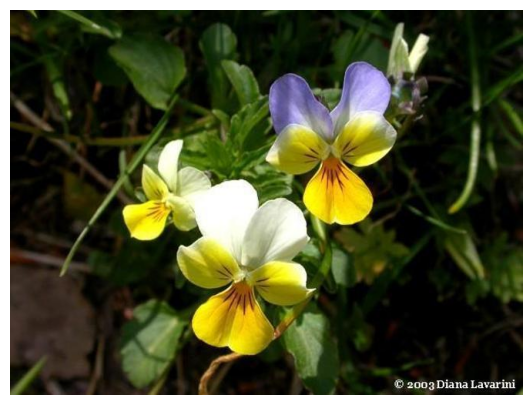

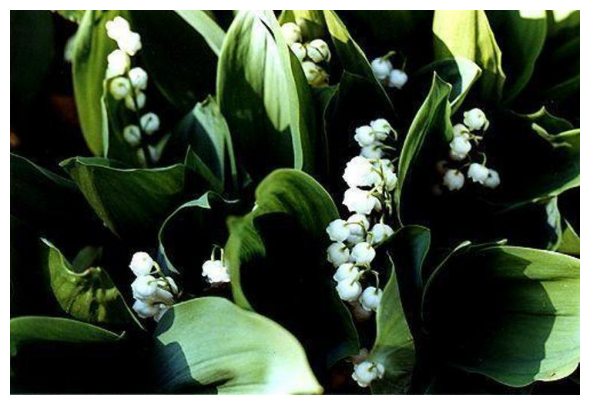

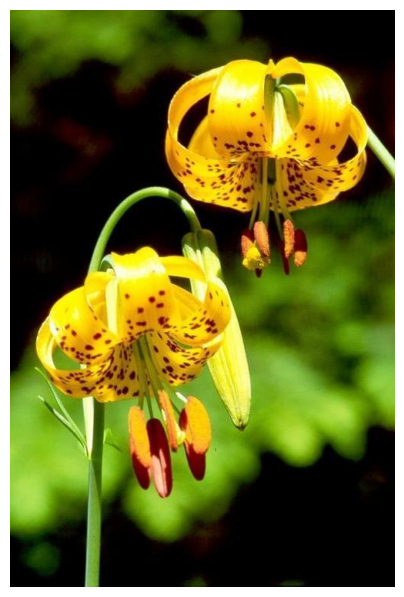

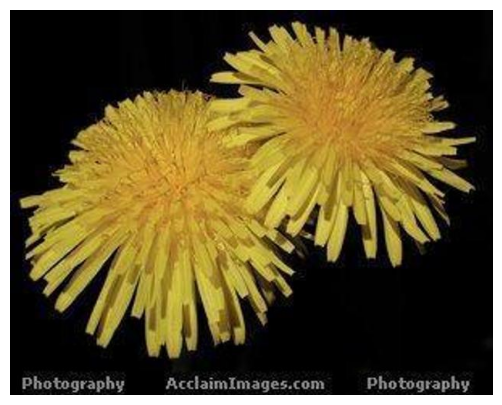

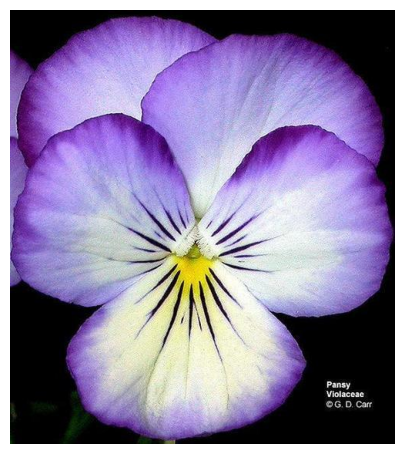

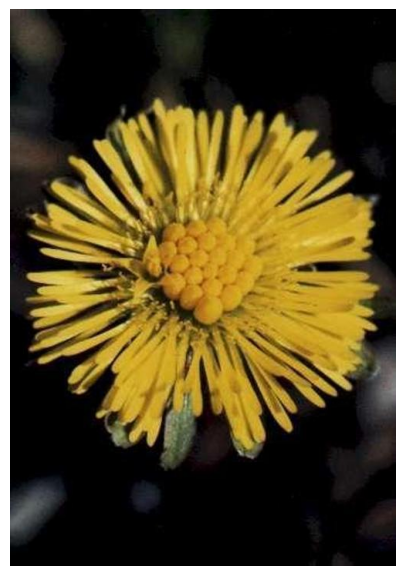

In [50]:
def main(in_folderpath, out_folderpath, image_index):
    # Creates a sorted list of the images folderpaths
    image_files = sorted(os.listdir(os.path.join(in_folderpath)))
    # Folderpath of the chosen image
    chosen_image_path = os.path.join(in_folderpath, image_files[image_index])
    # Calling the function which creates and normalizes the chosen image histogram
    chosen_norm_hist = create_chosen_hist(chosen_image_path)
    # Calling the function which compares the chosen images with the entire image dataset
    image_names, results = create_and_compare_hist(in_folderpath, image_files, chosen_norm_hist)
    # Calling the function which saves the images_names and results in a dataframe and turns it int a CSV
    save_results(in_folderpath, out_folderpath, image_names, results)

if __name__ == "__main__":
    main("../in", "../out", 1356)